In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load Dataset

In [85]:
data = pd.read_csv('phishing.csv')

In [86]:
data

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,11049,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11050,11050,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11051,11051,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11052,11052,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [88]:
data.describe()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
count,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,...,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000
mean,5526.500000,0.313914,-0.633345,0.738737,0.700561,0.741632,-0.734938,0.064049,0.251040,-0.336711,...,0.613353,0.816899,0.061335,0.377239,0.287407,-0.483626,0.721549,0.343948,0.719739,0.113986
std,3191.159272,0.949495,0.765973,0.674024,0.713625,0.670837,0.678165,0.817492,0.911856,0.941651,...,0.789845,0.576807,0.998162,0.926158,0.827680,0.875314,0.692395,0.569936,0.694276,0.993527
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2763.250000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5526.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8289.750000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11053.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [90]:
data.isnull().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

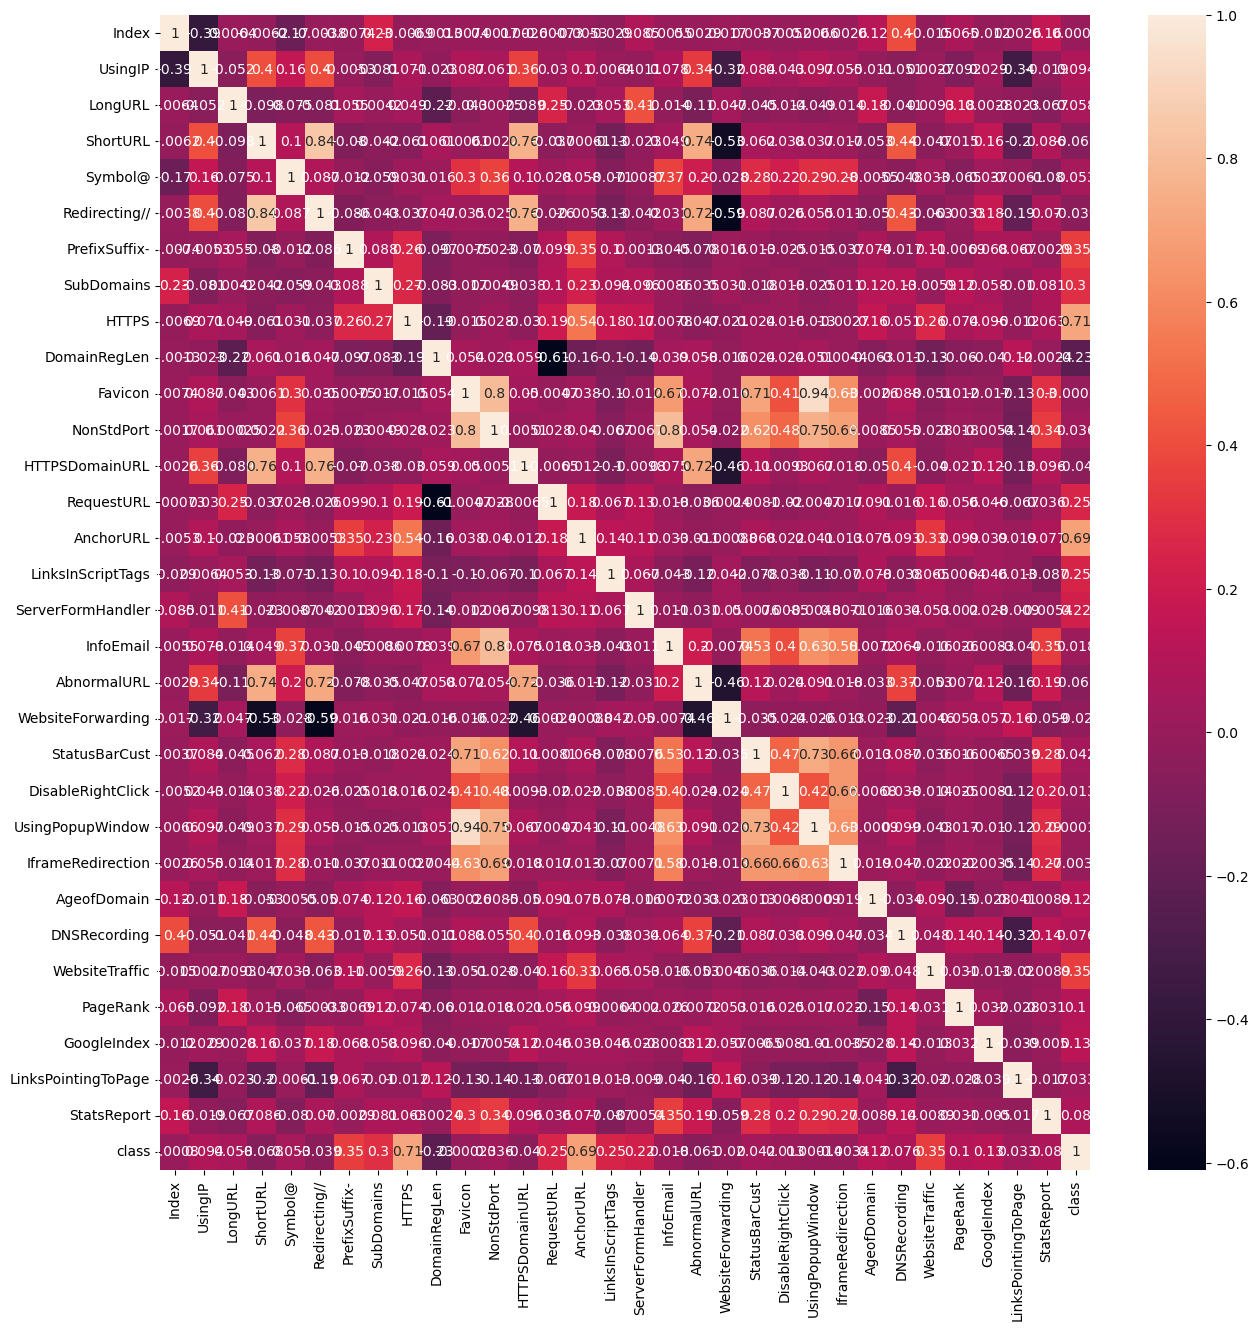

In [91]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

# Split the data into features (X) and labels (y)

In [92]:
X = data.drop(columns=['class'])
y = data['class']

# Split the data into training and testing sets

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Logistic Regression

In [94]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
y_pred = lr_classifier.predict(X_test)


In [96]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [97]:
print('Logistic Regression Model')
print(f'Accuracy: {accuracy}')
print(report)

Logistic Regression Model
Accuracy: 0.9201085318058486
              precision    recall  f1-score   support

          -1       0.92      0.90      0.91      1455
           1       0.92      0.94      0.93      1862

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317



# Decision Tree

In [98]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [99]:
y_pred1 = dt_classifier.predict(X_test)

In [100]:
accuracy1 = accuracy_score(y_test, y_pred1)
report1 = classification_report(y_test, y_pred1)

In [101]:
print('Decision Tree Model')
print(f'Accuracy: {accuracy1}')
print(report1)

Decision Tree Model
Accuracy: 0.9484473922218872
              precision    recall  f1-score   support

          -1       0.94      0.94      0.94      1455
           1       0.96      0.95      0.95      1862

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



# Random Forest

In [102]:
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support


In [103]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [104]:
y_pred2= rf_classifier.predict(X_test)

In [105]:
#accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')


In [106]:
print('Random Forest Classifier Model')
#print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Random Forest Classifier Model
Precision: 0.9222633527234267
Recall: 0.9366272824919442
F1 Score: 0.9293898214761525


In [107]:
accuracy2 = accuracy_score(y_test, y_pred2)
#report2 = classification_report(y_test, y_pred2)

In [108]:
print('Random Forest Classifier Model')
print(f'Accuracy: {accuracy2}')
#print(report2)

Random Forest Classifier Model
Accuracy: 0.9683448899608079


In [109]:
models = ['Random Forest']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy2, precision, recall, f1]

In [110]:
import matplotlib.pyplot as plt

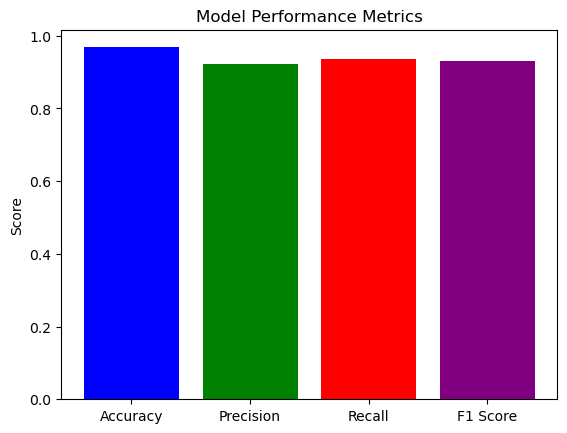

In [111]:
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.show()

# Naive Bayes

In [112]:
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)

GaussianNB()

In [113]:
y_pred3 = gnb_classifier.predict(X_test)

In [114]:
accuracy3 = accuracy_score(y_test, y_pred3)
report3 = classification_report(y_test, y_pred3)


In [115]:
print('Gaussian Naive Bayes (GaussianNB) Model')
print(f'Accuracy: {accuracy3}')
print(report3)


Gaussian Naive Bayes (GaussianNB) Model
Accuracy: 0.8760928549894483
              precision    recall  f1-score   support

          -1       0.81      0.94      0.87      1455
           1       0.94      0.83      0.88      1862

    accuracy                           0.88      3317
   macro avg       0.88      0.88      0.88      3317
weighted avg       0.89      0.88      0.88      3317



# Support Vector Classifier

In [116]:
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)

SVC()

In [117]:
y_pred = svc_classifier.predict(X_test)

In [118]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
print('Support Vector Classifier (SVC) Model')
print(f'Accuracy: {accuracy}')
print(report)

Support Vector Classifier (SVC) Model
Accuracy: 0.5613506180283389
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1455
           1       0.56      1.00      0.72      1862

    accuracy                           0.56      3317
   macro avg       0.28      0.50      0.36      3317
weighted avg       0.32      0.56      0.40      3317



# Gradient Boosting

In [120]:
from xgboost import XGBClassifier

In [121]:
data['class'] = data['class'].replace(-1, 0)

In [122]:
X = data.drop(columns=['class'])
y = data['class']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [124]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [125]:
y_pred = xgb_classifier.predict(X_test)

In [126]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('XGBoost Classifier (GBM) Model')
print(f'Accuracy: {accuracy}')
print(report)

XGBoost Classifier (GBM) Model
Accuracy: 0.964124208622249
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1455
           1       0.97      0.97      0.97      1862

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



# LR + DT + SVC ( Soft Voting )

In [127]:
lr_classifier = LogisticRegression()
svc_classifier = SVC(probability=True)
dt_classifier = DecisionTreeClassifier()

In [128]:
ensemble_model = VotingClassifier(estimators=[
    ('lr', lr_classifier),
    ('svc', svc_classifier),
    ('dt', dt_classifier)
], voting='soft')

In [129]:
ensemble_model.fit(X_train, y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('svc', SVC(probability=True)),
                             ('dt', DecisionTreeClassifier())],
                 voting='soft')

In [130]:
y_pred = ensemble_model.predict(X_test)

In [131]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [132]:
print('Hybrid Model [LR + SVC + DT] with Soft Voting')
print(f'Accuracy: {accuracy}')
print(report)

Hybrid Model [LR + SVC + DT] with Soft Voting
Accuracy: 0.9460355743141393
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1455
           1       0.95      0.96      0.95      1862

    accuracy                           0.95      3317
   macro avg       0.95      0.94      0.95      3317
weighted avg       0.95      0.95      0.95      3317



# LR + SVC + DT( Hard Voting )

In [133]:
lr_classifier = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()

In [134]:
ensemble_model = VotingClassifier(estimators=[
    ('lr', lr_classifier),
    ('svc', svc_classifier),
    ('dt', dt_classifier)
], voting='hard')

In [135]:
ensemble_model.fit(X_train, y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()), ('svc', SVC()),
                             ('dt', DecisionTreeClassifier())])

In [136]:
y_pred = ensemble_model.predict(X_test)


In [137]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [138]:
print('Hybrid Model [LR + SVC + DT] with Hard Voting')
print(f'Accuracy: {accuracy}')
print(report)

Hybrid Model [LR + SVC + DT] with Hard Voting
Accuracy: 0.9351823937292735
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1455
           1       0.91      0.98      0.94      1862

    accuracy                           0.94      3317
   macro avg       0.94      0.93      0.93      3317
weighted avg       0.94      0.94      0.93      3317



# DT + RF + XGB (Soft Voting)

In [139]:
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_classifier = XGBClassifier()

In [140]:
ensemble_model = VotingClassifier(estimators=[
    ('dt', dt_classifier),
    ('rf', rf_classifier),
    ('xgb', xgb_classifier)
], voting='soft')

In [141]:
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [142]:
y_pred = ensemble_model.predict(X_test)

In [143]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [144]:
print('Hybrid Model [DT + RF + XGB] with soft Voting')
print(f'Accuracy: {accuracy}')
print(report)

Hybrid Model [DT + RF + XGB] with soft Voting
Accuracy: 0.9626168224299065
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1455
           1       0.97      0.97      0.97      1862

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



# DT + RF + XGB (Hard Voting)

In [145]:
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_classifier = XGBClassifier()

In [146]:
ensemble_model = VotingClassifier(estimators=[
    ('dt', dt_classifier),
    ('rf', rf_classifier),
    ('xgb', xgb_classifier)
], voting='hard')

In [147]:
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

In [148]:
y_pred = ensemble_model.predict(X_test)

In [149]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [150]:
print('Hybrid Model [DT + RF + XGB] with soft Voting')
print(f'Accuracy: {accuracy}')
print(report)

Hybrid Model [DT + RF + XGB] with soft Voting
Accuracy: 0.9656315948145915
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1455
           1       0.97      0.97      0.97      1862

    accuracy                           0.97      3317
   macro avg       0.97      0.96      0.97      3317
weighted avg       0.97      0.97      0.97      3317

